# Crime Trends
## By: Karthik Sankar
This Jupyter Notebook will explore the some publicly available corona virus data. <br>
Ideally, we want to see if there are any trends that indicate warmer weather will hurt the spread of the virus. Based on this a model that predicts how the rate of infection will change based on temperature could be used to predict how corona virus cases will behave come summer.

In [1]:
#Basic set up for Google BigQuery

# Install the package with: pip install -e git+https://github.com/SohierDane/BigQuery_Helper#egg=bq_helper
#!pip install -e git+https://github.com/SohierDane/BigQuery_Helper#egg=bq_helper

#I've created an API key for this project and included it in the project folder.
#To be clear, this is a bad idea. It is only included this way for this demo
#https://cloud.google.com/docs/authentication/getting-started
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="Stack Overflow Project.json"
#!set GOOGLE_APPLICATION_CREDENTIALS="C:\Users\karth\Documents\MLprojects\Stack Overflow\Stack Overflow Project.json"

In [2]:
#Import the stackoverflow dataset from Google BigQuery

import bq_helper
import numpy as np
from bq_helper import BigQueryHelper
import pandas as pd
crime = bq_helper.BigQueryHelper(active_project="bigquery-public-data", dataset_name="chicago_crime")

crime.list_tables()

['crime']

In [3]:
#Filter the useful datapoints from BigQuery and save them locally
query_get_answers = """Select *
from `bigquery-public-data.chicago_crime.crime` as covid_data

limit 10000
;

"""

#where answers.owner_user_id Is NOT NULL and questions.owner_user_id is not NULL and questions.tags is NOT NULL 
#and Extract(Year from questions.creation_date)>2017 and Extract(Year from questions.creation_date)<2019

crime_data = crime.query_to_pandas_safe(query_get_answers,30)
crime_data.to_csv('crime_data_10000.csv', index=False)
len(crime_data)

10000

In [4]:
crime_data.head()

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,11695039,JC272752,2019-05-21 14:35:00+00:00,008XX E 40TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,None,False,False,...,4,36,11,1182394.0,1878378.0,2019,2019-06-30 15:56:27+00:00,41.821486,-87.606391,"(41.821485998, -87.606391313)"
1,11729910,JC315123,2019-06-20 21:43:00+00:00,001XX W SWANN ST,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,ALLEY,True,False,...,3,37,24,1176057.0,1874110.0,2019,2019-06-30 15:56:27+00:00,41.809919,-87.629767,"(41.809918997, -87.629766697)"
2,10271478,HY459797,2015-10-12 23:45:00+00:00,034XX S WESTERN AVE,2022,NARCOTICS,POSS: COCAINE,ALLEY,True,False,...,12,59,18,1160928.0,1881603.0,2015,2018-02-10 15:50:01+00:00,41.830807,-87.685050,"(41.830807149, -87.685050402)"
3,10829818,JA131293,2017-01-26 19:50:00+00:00,037XX S WESTERN AVE,0920,MOTOR VEHICLE THEFT,ATT: AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,12,59,07,1160980.0,1879877.0,2017,2017-02-14 15:49:42+00:00,41.826070,-87.684907,"(41.826069731, -87.684907409)"
4,11025722,JA356747,2017-07-20 13:20:00+00:00,037XX S ARCHER AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESTAURANT,False,False,...,12,59,11,1160845.0,1879718.0,2017,2018-02-10 15:50:01+00:00,41.825636,-87.685407,"(41.825636211, -87.685407095)"


In [5]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_key            10000 non-null  int64              
 1   case_number           10000 non-null  object             
 2   date                  10000 non-null  datetime64[ns, UTC]
 3   block                 10000 non-null  object             
 4   iucr                  10000 non-null  object             
 5   primary_type          10000 non-null  object             
 6   description           10000 non-null  object             
 7   location_description  9941 non-null   object             
 8   arrest                10000 non-null  bool               
 9   domestic              10000 non-null  bool               
 10  beat                  10000 non-null  int64              
 11  district              10000 non-null  int64              
 12  ward 

## Cleaning the dataset
Getting rid of extra attributes.

In [6]:
#delete extra columns
crime_data = crime_data.drop("beat", axis="columns", errors="ignore")
crime_data = crime_data.drop("unique_key", axis="columns", errors="ignore")
crime_data = crime_data.drop("case_number", axis="columns", errors="ignore")
crime_data = crime_data.drop("block", axis="columns", errors="ignore")
crime_data = crime_data.drop("iucr", axis="columns", errors="ignore")
crime_data = crime_data.drop("updated_on", axis="columns", errors="ignore")
crime_data = crime_data.drop("location", axis="columns", errors="ignore")
crime_data = crime_data.drop("district", axis="columns", errors="ignore")
crime_data = crime_data.drop("ward", axis="columns", errors="ignore")
crime_data = crime_data.drop("fbi_code", axis="columns", errors="ignore")
crime_data = crime_data.drop("x_coordinate", axis="columns", errors="ignore")#redundant
crime_data = crime_data.drop("y_coordinate", axis="columns", errors="ignore")#redundant
crime_data.head()

,date,primary_type,description,location_description,arrest,domestic,community_area,year,latitude,longitude
0,2019-05-21 14:35:00+00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,None,False,False,36,2019,41.821486,-87.606391
1,2019-06-20 21:43:00+00:00,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,ALLEY,True,False,37,2019,41.809919,-87.629767
2,2015-10-12 23:45:00+00:00,NARCOTICS,POSS: COCAINE,ALLEY,True,False,59,2015,41.830807,-87.685050
3,2017-01-26 19:50:00+00:00,MOTOR VEHICLE THEFT,ATT: AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,False,59,2017,41.826070,-87.684907
4,2017-07-20 13:20:00+00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESTAURANT,False,False,59,2017,41.825636,-87.685407


In [7]:
crime_data.describe()

,community_area,year,latitude,longitude
count,10000.000000,10000.00000,9751.000000,9751.000000
mean,43.982800,2009.95660,41.798264,-87.664665
std,19.320239,5.37948,0.119115,0.093417
min,0.000000,2001.00000,36.619446,-91.686566
25%,34.000000,2005.00000,41.714758,-87.731860
50%,50.000000,2009.00000,41.781584,-87.657899
75%,57.000000,2015.00000,41.835529,-87.595484
max,74.000000,2020.00000,42.018841,-87.525161


In [8]:
#get rid of outliers
crime_data = crime_data[crime_data.latitude!=None]
crime_data = crime_data[crime_data.longitude!=None]
crime_data = crime_data[crime_data.latitude>40]

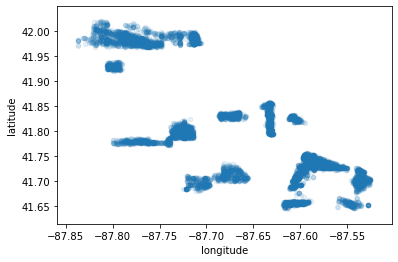

In [9]:
crime_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Crime locations are very clustered. This leads me to believe location is a good predictor of crime

In [10]:
#Cast booleans to integers
crime_data["arrest"] = crime_data["arrest"]*1
crime_data["domestic"] = crime_data["domestic"]*1

In [11]:
#Convert community_area number to community name
#Community names from: https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6
#JS code to scrape values from above site:
#var communityCode = {}
#for(let row of document.getElementsByTagName("tr"))
#    if(row.getElementsByTagName("td")[6])
#        communityCode[Number(row.getElementsByTagName("td")[7].innerText)] = row.getElementsByTagName("td")[6].innerText

import json 
look_up_key = ["ROGERS PARK","WEST RIDGE","UPTOWN","LINCOLN SQUARE","NORTH CENTER","LAKE VIEW","LINCOLN PARK","NEAR NORTH SIDE","EDISON PARK","NORWOOD PARK","JEFFERSON PARK","FOREST GLEN","NORTH PARK","ALBANY PARK","PORTAGE PARK","IRVING PARK","DUNNING","MONTCLARE","BELMONT CRAGIN","HERMOSA","AVONDALE","LOGAN SQUARE","HUMBOLDT PARK","WEST TOWN","AUSTIN","WEST GARFIELD PARK","EAST GARFIELD PARK","NEAR WEST SIDE","NORTH LAWNDALE","SOUTH LAWNDALE","LOWER WEST SIDE","LOOP","NEAR SOUTH SIDE","ARMOUR SQUARE","DOUGLAS","OAKLAND","FULLER PARK","GRAND BOULEVARD","KENWOOD","WASHINGTON PARK","HYDE PARK","WOODLAWN","SOUTH SHORE","CHATHAM","AVALON PARK","SOUTH CHICAGO","BURNSIDE","CALUMET HEIGHTS","ROSELAND","PULLMAN","SOUTH DEERING","EAST SIDE","WEST PULLMAN","RIVERDALE","HEGEWISCH","GARFIELD RIDGE","ARCHER HEIGHTS","BRIGHTON PARK","MCKINLEY PARK","BRIDGEPORT","NEW CITY","WEST ELSDON","GAGE PARK","CLEARING","WEST LAWN","CHICAGO LAWN","WEST ENGLEWOOD","ENGLEWOOD","GREATER GRAND CROSSING","ASHBURN","AUBURN GRESHAM","BEVERLY","WASHINGTON HEIGHTS","MOUNT GREENWOOD","MORGAN PARK","OHARE","EDGEWATER"]
crime_data["community_area_name"] = crime_data.apply(lambda row:
    look_up_key[int(row["community_area"])]
, axis=1)

In [12]:
#One-hot-encoding text
crime_data_encoded = crime_data
type_encoded = pd.get_dummies(crime_data_encoded.primary_type, prefix='primary_type')
crime_data_encoded = pd.concat([crime_data_encoded, type_encoded], axis=1, sort=False)
location_encoded = pd.get_dummies(crime_data_encoded.location_description, prefix='location_description')
crime_data_encoded = pd.concat([crime_data_encoded, location_encoded], axis=1, sort=False)
crime_data_encoded["aggravated"] = crime_data_encoded.apply(lambda row: 
    (row["description"].find("AGGRAVATED")!=-1)*1
, axis=1)
community_encoded = pd.get_dummies(crime_data_encoded.community_area_name, prefix='community_area_name')
crime_data_encoded = pd.concat([crime_data_encoded, community_encoded], axis=1, sort=False)

In [13]:
crime_data_encoded.head()

,date,primary_type,description,location_description,arrest,domestic,community_area,year,latitude,longitude,...,community_area_name_MORGAN PARK,community_area_name_NORTH PARK,community_area_name_NORWOOD PARK,community_area_name_ROGERS PARK,community_area_name_ROSELAND,community_area_name_SOUTH CHICAGO,community_area_name_SOUTH DEERING,community_area_name_WASHINGTON HEIGHTS,community_area_name_WEST LAWN,community_area_name_WEST PULLMAN
0,2019-05-21 14:35:00+00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,None,0,0,36,2019,41.821486,-87.606391,...,0,0,0,0,0,0,0,0,0,0
1,2019-06-20 21:43:00+00:00,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,ALLEY,1,0,37,2019,41.809919,-87.629767,...,0,0,0,0,0,0,0,0,0,0
2,2015-10-12 23:45:00+00:00,NARCOTICS,POSS: COCAINE,ALLEY,1,0,59,2015,41.830807,-87.685050,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-26 19:50:00+00:00,MOTOR VEHICLE THEFT,ATT: AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),0,0,59,2017,41.826070,-87.684907,...,0,0,0,0,0,0,0,0,0,0
4,2017-07-20 13:20:00+00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESTAURANT,0,0,59,2017,41.825636,-87.685407,...,0,0,0,0,0,0,0,0,0,0


# Looking for patterns

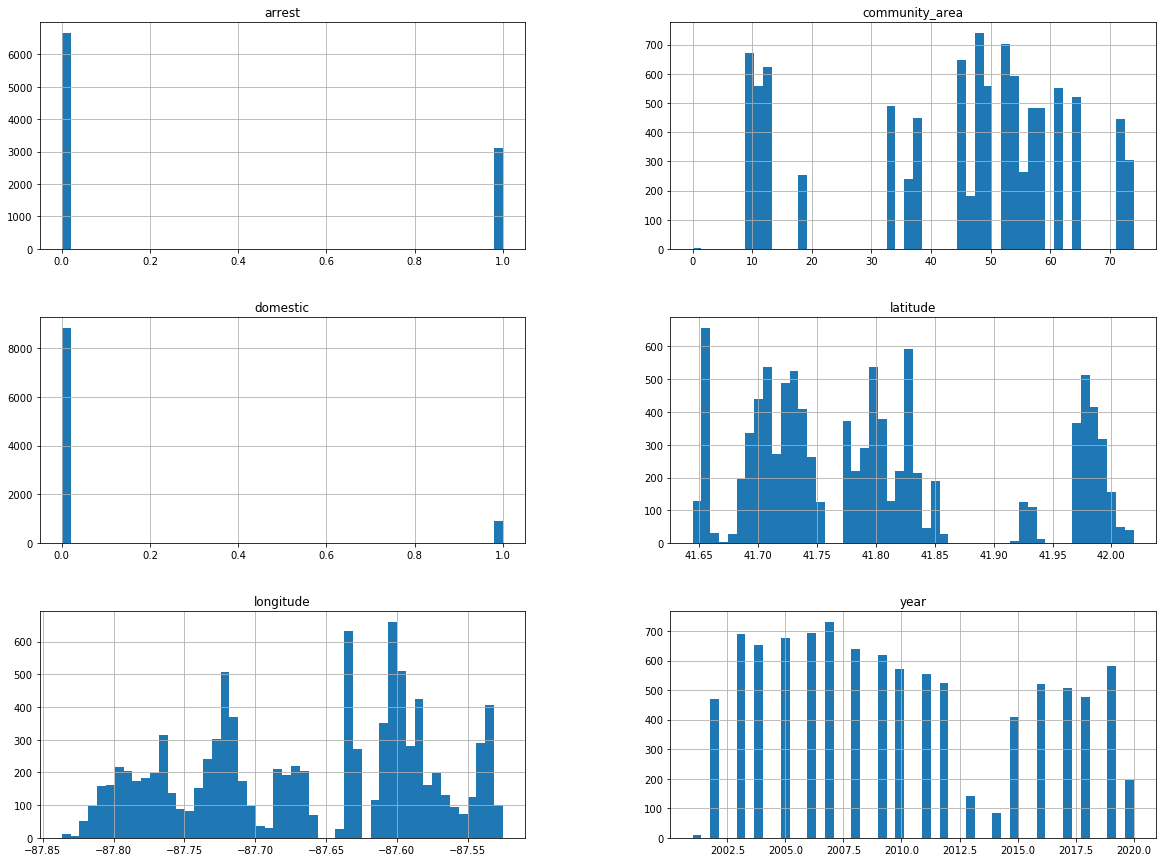

In [14]:
#A histogram of every numerical column in stack_overflow_data
#!pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
crime_data.hist(bins=50, figsize=(20,15))
plt.show()

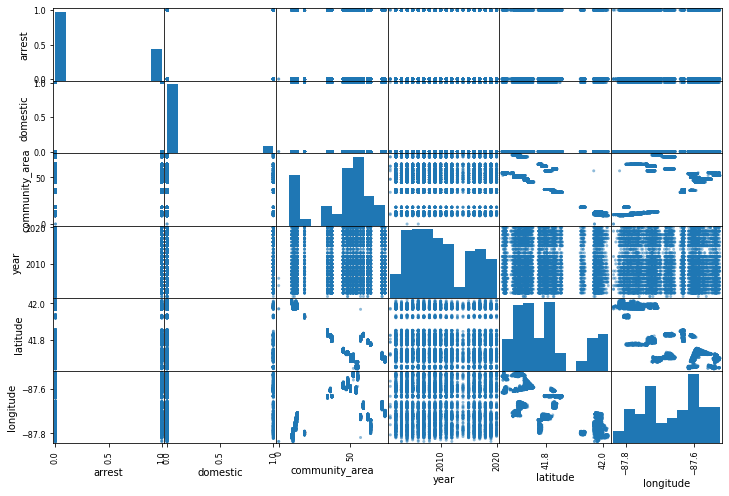

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(crime_data, figsize=(12, 8)); #[attributes]

This grid serves as a starting point<br>
It reveals minimual correlation between the non one-hot-endcoded variables

## ML Model to predict question - answer wait time

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(crime_data_encoded, test_size=0.2, random_state=42)

In [17]:
corr_matrix = crime_data_encoded.corr()
corr_matrix["arrest"].sort_values(ascending=False)

arrest                                           1.000000
primary_type_NARCOTICS                           0.441648
primary_type_LIQUOR LAW VIOLATION                0.156068
primary_type_INTERFERENCE WITH PUBLIC OFFICER    0.138716
location_description_STREET                      0.134310
                                                   ...   
primary_type_CRIMINAL DAMAGE                    -0.112030
primary_type_THEFT                              -0.123983
primary_type_MOTOR VEHICLE THEFT                -0.131214
primary_type_DECEPTIVE PRACTICE                 -0.157256
location_description_RESIDENCE                  -0.178187
Name: arrest, Length: 163, dtype: float64

This shows that crimes involving narcotic have a higher chance of leading to an arrest

In [18]:
train_set.head()

,date,primary_type,description,location_description,arrest,domestic,community_area,year,latitude,longitude,...,community_area_name_MORGAN PARK,community_area_name_NORTH PARK,community_area_name_NORWOOD PARK,community_area_name_ROGERS PARK,community_area_name_ROSELAND,community_area_name_SOUTH CHICAGO,community_area_name_SOUTH DEERING,community_area_name_WASHINGTON HEIGHTS,community_area_name_WEST LAWN,community_area_name_WEST PULLMAN
7253,2020-03-29 12:00:00+00:00,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,RESIDENCE,0,0,72,2020,41.711858,-87.680101,...,0,0,0,0,0,0,0,1,0,0
5597,2012-05-15 09:00:00+00:00,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,BANK,0,0,45,2012,41.737408,-87.585639,...,0,0,0,0,0,1,0,0,0,0
5173,2006-11-25 12:18:47+00:00,ROBBERY,ATTEMPT: STRONGARM-NO WEAPON,STREET,0,0,45,2006,41.750944,-87.594262,...,0,0,0,0,0,1,0,0,0,0
4754,2017-10-23 23:30:00+00:00,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,0,0,34,2017,41.854070,-87.634404,...,0,0,0,0,0,0,0,0,0,0
7448,2008-08-05 11:55:00+00:00,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,PARKING LOT/GARAGE(NON.RESID.),0,1,37,2008,41.794556,-87.630577,...,0,0,0,0,0,0,0,0,0,0


In [91]:
crime_data_inputs = train_set
crime_data_inputs = crime_data_inputs.drop("year", axis=1) 
crime_data_inputs = crime_data_inputs.drop("date", axis=1)
crime_data_inputs = crime_data_inputs.drop("latitude", axis=1)
crime_data_inputs = crime_data_inputs.drop("longitude", axis=1)
crime_data_inputs = crime_data_inputs.drop("community_area", axis=1)


#getting rid of non - numerical datapoints
crime_data_inputs = crime_data_inputs.drop("primary_type", axis=1)
crime_data_inputs = crime_data_inputs.drop("description", axis=1)
crime_data_inputs = crime_data_inputs.drop("location_description", axis=1)
crime_data_inputs = crime_data_inputs.drop("community_area_name", axis=1)



crime_data_outputs = train_set["arrest"].copy()
crime_data_inputs = crime_data_inputs.drop("arrest", axis=1)

print(", ".join(crime_data_inputs.columns))

domestic, primary_type_ARSON, primary_type_ASSAULT, primary_type_BATTERY, primary_type_BURGLARY, primary_type_CONCEALED CARRY LICENSE VIOLATION, primary_type_CRIM SEXUAL ASSAULT, primary_type_CRIMINAL DAMAGE, primary_type_CRIMINAL SEXUAL ASSAULT, primary_type_CRIMINAL TRESPASS, primary_type_DECEPTIVE PRACTICE, primary_type_GAMBLING, primary_type_HOMICIDE, primary_type_INTERFERENCE WITH PUBLIC OFFICER, primary_type_INTIMIDATION, primary_type_KIDNAPPING, primary_type_LIQUOR LAW VIOLATION, primary_type_MOTOR VEHICLE THEFT, primary_type_NARCOTICS, primary_type_NON-CRIMINAL (SUBJECT SPECIFIED), primary_type_OBSCENITY, primary_type_OFFENSE INVOLVING CHILDREN, primary_type_OTHER NARCOTIC VIOLATION, primary_type_OTHER OFFENSE, primary_type_PROSTITUTION, primary_type_PUBLIC INDECENCY, primary_type_PUBLIC PEACE VIOLATION, primary_type_ROBBERY, primary_type_SEX OFFENSE, primary_type_STALKING, primary_type_THEFT, primary_type_WEAPONS VIOLATION, location_description_ABANDONED BUILDING, location_des

### Using LinearRegression

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(crime_data_inputs, crime_data_outputs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, crime_data_inputs, crime_data_outputs, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

print("Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Scores: [3.67794980e+08 1.10214038e+10 5.35133548e+10 8.34881917e+11
 2.53170894e+10 8.55469097e+08 5.53601768e+11 5.84334116e+11
 3.79648504e-01 8.27856371e+09]
Mean: 207217147673.9915
Standard deviation: 303192205757.75085


Thats an insanly large diviation. I will have to explore other models.
LinearRegression does not seem to handle one-hot-encoding well.

### Using DecisionTreeRegressor

In [55]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(crime_data_inputs, crime_data_outputs)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, crime_data_inputs, crime_data_outputs, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

print("Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Scores: [0.43175566 0.4259568  0.42529126 0.40301809 0.41471183 0.41419591
 0.43984127 0.42644247 0.45839832 0.42016366]
Mean: 0.4259775259392205
Standard deviation: 0.014505327374050941


Much less error than LinearRegression

### Using RandomForestRegressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(crime_data_inputs, crime_data_outputs)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, crime_data_inputs, crime_data_outputs, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

print("Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Scores: [0.38791557 0.38324444 0.39060855 0.36550704 0.36833996 0.37737141
 0.39491088 0.39322062 0.40733587 0.39219306]
Mean: 0.38606473977256756
Standard deviation: 0.012099027936533105


## The RandomForestRegressor has the lowest root mean square error so it will be the choosen model
Fine tuning the model with a grid search

In [59]:
#Test various hyper parameters and compare them with each other
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [1, 3, 10, 15, 20, 25, 30, 35], 'max_features': [1,2,3,4]},
    {'bootstrap': [False], 'n_estimators': [1, 3, 10, 20, 30, 35], 'max_features': [1,2,3,4]},  
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(crime_data_inputs, crime_data_outputs)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [60]:
#Print the results of all the other tested hyperparameters
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4673759318559852 {'max_features': 1, 'n_estimators': 1}
0.4158193760685677 {'max_features': 1, 'n_estimators': 3}
0.3925866742228126 {'max_features': 1, 'n_estimators': 10}
0.3900024795621288 {'max_features': 1, 'n_estimators': 15}
0.38670611494236046 {'max_features': 1, 'n_estimators': 20}
0.3857078118815909 {'max_features': 1, 'n_estimators': 25}
0.3864021737630753 {'max_features': 1, 'n_estimators': 30}
0.3852470354737615 {'max_features': 1, 'n_estimators': 35}
0.4656832536104821 {'max_features': 2, 'n_estimators': 1}
0.41402864017482494 {'max_features': 2, 'n_estimators': 3}
0.39234087032088544 {'max_features': 2, 'n_estimators': 10}
0.3884151292595416 {'max_features': 2, 'n_estimators': 15}
0.38666114262631535 {'max_features': 2, 'n_estimators': 20}
0.38572780997838096 {'max_features': 2, 'n_estimators': 25}
0.38550100747865806 {'max_features': 2, 'n_estimators': 30}
0.38469442515661856 {'max_features': 2, 'n_estimators': 35}
0.467837137749558 {'max_features': 3, 'n_estimators':

In [61]:
#Get hyperparameters that result in the lowest error
grid_search.best_params_

{'max_features': 3, 'n_estimators': 30}

In [62]:
#Create the model best on the best hyper parameters
final_model = grid_search.best_estimator_

## Testing the final model with the test set

This set has not been shown to any model until now

In [65]:
#Clean test set in the same way as training set

crime_data_inputs_test = test_set
crime_data_inputs_test = crime_data_inputs_test.drop("year", axis=1) 
crime_data_inputs_test = crime_data_inputs_test.drop("date", axis=1)
crime_data_inputs_test = crime_data_inputs_test.drop("latitude", axis=1)
crime_data_inputs_test = crime_data_inputs_test.drop("longitude", axis=1)
crime_data_inputs_test = crime_data_inputs_test.drop("community_area", axis=1)

#getting rid of non - numerical datapoints
crime_data_inputs_test = crime_data_inputs_test.drop("primary_type", axis=1)
crime_data_inputs_test = crime_data_inputs_test.drop("description", axis=1)
crime_data_inputs_test = crime_data_inputs_test.drop("location_description", axis=1)
crime_data_inputs_test = crime_data_inputs_test.drop("community_area_name", axis=1)



crime_data_outputs_test = test_set["arrest"].copy()
crime_data_inputs_test = crime_data_inputs_test.drop("arrest", axis=1)


crime_data_inputs_test

,domestic,primary_type_ARSON,primary_type_ASSAULT,primary_type_BATTERY,primary_type_BURGLARY,primary_type_CONCEALED CARRY LICENSE VIOLATION,primary_type_CRIM SEXUAL ASSAULT,primary_type_CRIMINAL DAMAGE,primary_type_CRIMINAL SEXUAL ASSAULT,primary_type_CRIMINAL TRESPASS,...,community_area_name_MORGAN PARK,community_area_name_NORTH PARK,community_area_name_NORWOOD PARK,community_area_name_ROGERS PARK,community_area_name_ROSELAND,community_area_name_SOUTH CHICAGO,community_area_name_SOUTH DEERING,community_area_name_WASHINGTON HEIGHTS,community_area_name_WEST LAWN,community_area_name_WEST PULLMAN
4649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8850,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5635,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#Find the error with the final model
from sklearn.metrics import mean_squared_error

final_predictions = final_model.predict(crime_data_inputs_test)
final_mse = mean_squared_error(crime_data_outputs_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse 

0.37629109041098446

In [102]:
#Function that takes advantage of model to make predictions

def predictOddsOfArrest(domestic,aggravated,typeOfCrime,areaName,locationDesc):
    input = pd.DataFrame(columns=crime_data_inputs_test.columns)
    input = input.append({'domestic':domestic*1, 'aggravated':aggravated*1, 'primary_type_'+typeOfCrime.upper():1, 'location_description_'+locationDesc.upper():1, 'community_area_name_'+areaName.upper():1}, ignore_index=True)
    input = input.fillna(0)
    return final_model.predict(input)[0]

# Here is a prediction function that uses the model trained above
## It returns the chances that the crime will result in an arrest
### Parameters: was the crime domestic (true or false), was the crime aggravated (true or false), type of crime , name of the area, police description of the area

In [104]:
predictOddsOfArrest(True, True, "narcotics","South Chicago","residence")

0.4534171846671847

In [105]:
predictOddsOfArrest(True, False, "narcotics","South Chicago","residence")

0.4432134532134533

In [107]:
predictOddsOfArrest(False, True, "narcotics","South Chicago","residence")

0.6515873015873016

In [108]:
predictOddsOfArrest(False, True, "theft","South Chicago","residence")

0.1125551899081311

In [109]:
predictOddsOfArrest(False, True, "deceptive practice","South Chicago","residence")

0.11666666666666665